In [9]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [11]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [ ]:
!pip install citipy

In [ ]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

trairi br
kumbo cm
attawapiskat ca
east london za
halalo wf
yellowknife ca
belushya guba ru
georgetown sh
vaini to
te anau nz
hobart au
eugene us
carnarvon au
mar del plata ar
opuwo na
rikitea pf
barentsburg sj
arraial do cabo br
castro cl
isangel vu
yellowknife ca
chuy uy
rikitea pf
victoria sc
mataura pf
nanortalik gl
mahebourg mu
qaanaaq gl
kahului us
hilo us
balud ph
punta arenas cl
lejanias co
rikitea pf
kremenki ru
ushuaia ar
rikitea pf
rikitea pf
yumen cn
hilo us
kegayli uz
ushuaia ar
vaini to
hithadhoo mv
longyearbyen sj
vilyuysk ru
mar del plata ar
pangkalanbuun id
lima pe
hobart au
marfino ru
zanjan ir
upernavik gl
rikitea pf
barra br
busselton au
izhmorskiy ru
cayenne gf
sitka us
albany au
kapaa us
nouadhibou mr
kon tum vn
rikitea pf
cape town za
kindu cd
toora-khem ru
khandagayty ru
cidreira br
hermanus za
arraial do cabo br
new norfolk au
atuona pf
zhangye cn
bredasdorp za
sabang id
pisco pe
kapaa us
esperance au
skelleftea se
kloulklubed pw
saskylakh ru
illoqqortoormiut g

hilo us
plainfield us
mar del plata ar
rikitea pf
cherskiy ru
dunedin nz
rikitea pf
jamestown sh
rawson ar
clyde river ca
severo-kurilsk ru
mecca sa
ketegyhaza hu
taunggyi mm
mirik in
puerto ayora ec
campbellton ca
tiksi ru
mar del plata ar
ancud cl
codrington ag
karaul ru
arraial do cabo br
isangel vu
thaton mm
pangody ru
taolanaro mg
cali co
punta arenas cl
rikitea pf
waingapu id
port alfred za
bluff nz
lavrentiya ru
mataura pf
illoqqortoormiut gl
faanui pf
atuona pf
busselton au
albany au
hermanus za
huarmey pe
puerto escondido mx
vila velha br
madang pg
vardo no
ushuaia ar
isangel vu
ushuaia ar
port lincoln au
port alfred za
hilo us
butaritari ki
iqaluit ca
ushuaia ar
hermanus za
ushuaia ar
bambous virieux mu
pevek ru
arraial do cabo br
mahebourg mu
gazanjyk tm
new norfolk au
hervey bay au
hermanus za
biak id
deer lake ca
klaksvik fo
benjamin constant br
manokwari id
saskylakh ru
jamestown sh
vaini to
apodi br
damghan ir
mataura pf
rikitea pf
puerto ayora ec
redlands us
tilichiki r

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

# Get the city weather data 

In [50]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [51]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [52]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [53]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

609

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | esperance
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | la ronge
Processing Record 4 of Set 1 | samalaeulu
City not found. Skipping...
Processing Record 5 of Set 1 | stornoway
Processing Record 6 of Set 1 | gaurnadi
Processing Record 7 of Set 1 | mokokchung
Processing Record 8 of Set 1 | thompson
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | dauphin
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | nantucket
Processing Record 13 of Set 1 | portland
Processing Record 14 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | castro
Processing Record 18 of Set 1 | sept-iles
Processing Record 19 of Set 1 | qaanaaq
Processing Record 20 of Set 1 | kitui
Processing Record 21 of Set 1 | geraldton
Processing Record 

Processing Record 40 of Set 4 | orlik
Processing Record 41 of Set 4 | llangefni
Processing Record 42 of Set 4 | victor harbor
Processing Record 43 of Set 4 | havelock
Processing Record 44 of Set 4 | diffa
Processing Record 45 of Set 4 | galgani
City not found. Skipping...
Processing Record 46 of Set 4 | santiago de cuba
Processing Record 47 of Set 4 | mount gambier
Processing Record 48 of Set 4 | verkhnyaya inta
Processing Record 49 of Set 4 | boende
Processing Record 50 of Set 4 | galeana
Processing Record 1 of Set 5 | fortuna
Processing Record 2 of Set 5 | itacarambi
Processing Record 3 of Set 5 | maryville
Processing Record 4 of Set 5 | naryan-mar
Processing Record 5 of Set 5 | chacabuco
Processing Record 6 of Set 5 | komsomolskiy
Processing Record 7 of Set 5 | chenove
Processing Record 8 of Set 5 | tezu
Processing Record 9 of Set 5 | bridlington
Processing Record 10 of Set 5 | deputatskiy
Processing Record 11 of Set 5 | constitucion
Processing Record 12 of Set 5 | gurskoye
City not

Processing Record 26 of Set 8 | susanino
Processing Record 27 of Set 8 | hengyang
Processing Record 28 of Set 8 | aswan
Processing Record 29 of Set 8 | liling
Processing Record 30 of Set 8 | palmas de monte alto
Processing Record 31 of Set 8 | porto santo
Processing Record 32 of Set 8 | belmonte
Processing Record 33 of Set 8 | vallenar
Processing Record 34 of Set 8 | novoagansk
Processing Record 35 of Set 8 | sharjah
Processing Record 36 of Set 8 | davila
Processing Record 37 of Set 8 | naushki
Processing Record 38 of Set 8 | kemijarvi
Processing Record 39 of Set 8 | bac lieu
Processing Record 40 of Set 8 | nago
Processing Record 41 of Set 8 | orsha
Processing Record 42 of Set 8 | pervomayskoye
Processing Record 43 of Set 8 | afua
Processing Record 44 of Set 8 | oranjemund
Processing Record 45 of Set 8 | reyes
Processing Record 46 of Set 8 | san ignacio
Processing Record 47 of Set 8 | alotau
City not found. Skipping...
Processing Record 48 of Set 8 | olafsvik
Processing Record 49 of Se

Processing Record 16 of Set 12 | ibra
Processing Record 17 of Set 12 | kargasok
Processing Record 18 of Set 12 | sao gabriel da cachoeira
Processing Record 19 of Set 12 | quimper
Processing Record 20 of Set 12 | rafaela
Processing Record 21 of Set 12 | natal
Processing Record 22 of Set 12 | chastoozerye
City not found. Skipping...
Processing Record 23 of Set 12 | iwanai
Processing Record 24 of Set 12 | paamiut
Processing Record 25 of Set 12 | seabra
Processing Record 26 of Set 12 | phuthaditjhaba
Processing Record 27 of Set 12 | rio claro
Processing Record 28 of Set 12 | muisne
Processing Record 29 of Set 12 | vutcani
Processing Record 30 of Set 12 | plettenberg bay
Processing Record 31 of Set 12 | porto novo
Processing Record 32 of Set 12 | tshikapa
Processing Record 33 of Set 12 | igrim
Processing Record 34 of Set 12 | santa fe
Processing Record 35 of Set 12 | cidreira
Processing Record 36 of Set 12 | qasigiannguit
Processing Record 37 of Set 12 | sogdiondon
City not found. Skipping.

In [18]:
len(city_data)

553

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

NameError: name 'city_data' is not defined

In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [54]:
city_data_to_load="weather_data/cities.csv"
city_data_df=pd.read_csv(city_data_to_load)
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Esperance,-33.8667,121.9000,66.04,58,5,19.26,AU,2021-07-26 06:41:27
1,1,Albany,42.6001,-73.9662,61.36,96,0,3.29,US,2021-07-26 06:38:08
2,2,La Ronge,55.1001,-105.2842,57.45,88,40,1.14,CA,2021-07-26 06:41:28
3,3,Stornoway,58.2093,-6.3865,59.50,91,86,7.78,GB,2021-07-26 06:41:28
4,4,Gaurnadi,22.9667,90.2333,91.87,64,100,4.76,BD,2021-07-26 06:41:29


In [55]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [56]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt

In [57]:
# Import time module
import time

# Get today's date in seconds.
today = time.time()
today


1627285442.9578931

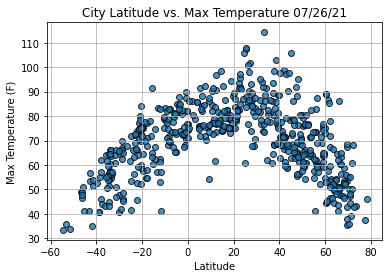

In [58]:

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

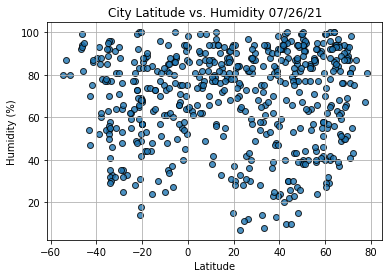

In [59]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

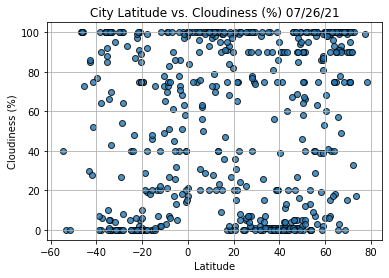

In [60]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

In [61]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [62]:
index13 = city_data_df.loc[13]

In [63]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,1,Albany,42.6001,-73.9662,61.36,96,0,3.29,US,2021-07-26 06:38:08
2,2,La Ronge,55.1001,-105.2842,57.45,88,40,1.14,CA,2021-07-26 06:41:28
3,3,Stornoway,58.2093,-6.3865,59.50,91,86,7.78,GB,2021-07-26 06:41:28
4,4,Gaurnadi,22.9667,90.2333,91.87,64,100,4.76,BD,2021-07-26 06:41:29
5,5,Mokokchung,26.3333,94.5333,76.75,82,100,1.57,IN,2021-07-26 06:41:29
...,...,...,...,...,...,...,...,...,...,...
546,546,Ayan,56.4500,138.1667,69.12,66,63,5.39,RU,2021-07-26 06:44:44
549,549,Qaqortoq,60.7167,-46.0333,45.10,62,98,3.29,GL,2021-07-26 06:44:45
550,550,Maku,39.2911,44.4521,81.19,47,0,6.91,IR,2021-07-26 06:44:46
551,551,Marquette,46.5333,-87.6335,67.17,75,5,6.62,US,2021-07-26 06:44:46


In [66]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

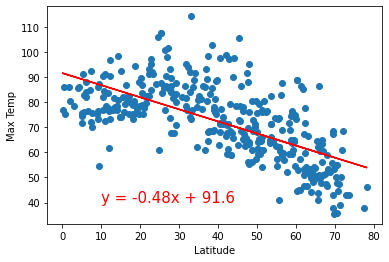

In [74]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

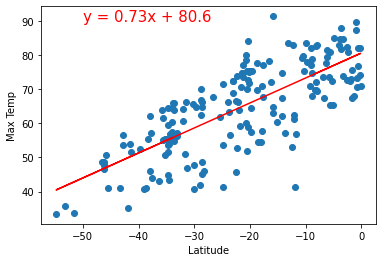

In [68]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))


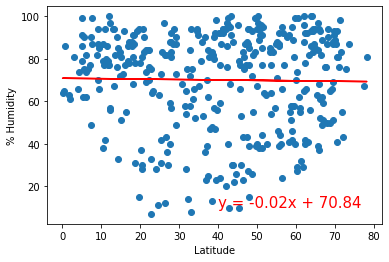

In [69]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

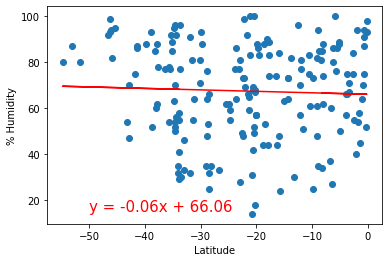

In [73]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))


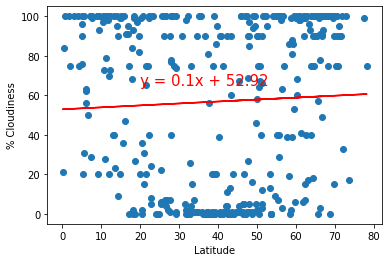

In [93]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(20,65))


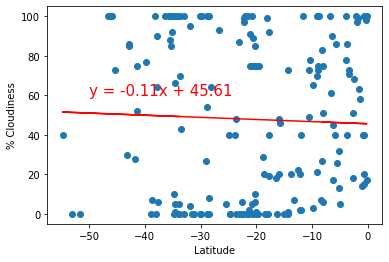

In [81]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))


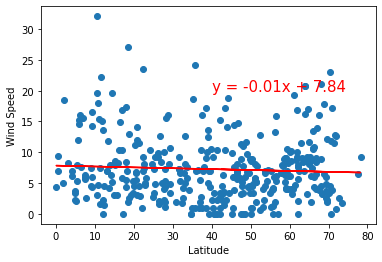

In [96]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,20))


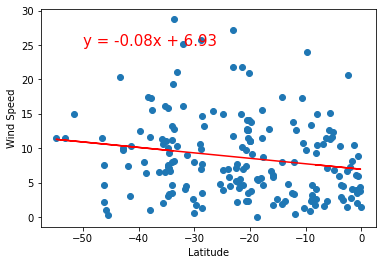

In [99]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,2))